In [1]:
import matplotlib.pyplot as plt
import pandas as pd

from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [2]:
########################################
# DataFrame Setup Function
########################################

def setup_dataframes(dataset_name, infer_mode, features, attribute=None):
    if attribute:
        log_path = dataset_name + '/monitoring_' + attribute + '_quality_log.csv'
        train = 'train_batch'
        infer = 'infer_batch'
    else:
        log_path = dataset_name + '/monitoring_quality_log.csv'
        train = 'skip_training_starting_batch'
        infer = 'batch'

    df_full = pd.read_csv(log_path, sep=';')
    df_full = df_full[['infer_mode', 'features', 'dk_cells', train,
                       infer, 'precision', 'recall', 'f1']]

    df = df_full.loc[(df_full['infer_mode'] == infer_mode) & (df_full['features'] == features)]

    df_list = []
    for skip_training_starting_batch in df[train].unique().tolist():
        tmp_df = df.loc[df[train] == skip_training_starting_batch]
        tmp_df = tmp_df.astype({'dk_cells': 'int32', infer: 'int32',
                                'precision': 'float64', 'recall': 'float64', 'f1': 'float64'})

        df_list.append(tmp_df)

    return df_list

In [3]:
########################################
# Chart Plotting Function
########################################

def plot_charts(df_list, attribute=None):
    if attribute:
        train = 'train_batch'
        infer = 'infer_batch'
    else:
        train = 'skip_training_starting_batch'
        infer = 'batch'

    count = 0

    chart_rows = 33
    chart_columns = 3
    fig, axes = plt.subplots(chart_rows, chart_columns, sharex=True, sharey=True,
                             figsize=(chart_columns * 7, chart_rows * 5))

    for i in range(chart_rows):
        for j in range(chart_columns):
            current_df = df_list[count]
            count += 1
            
            current_df.loc[current_df['dk_cells'] == 0, ['precision', 'recall', 'f1']] = 1

            axes[i, j].plot(infer, 'precision',
                            data=current_df, marker='', color=palette(1), label='precision', linewidth=3)
            axes[i, j].plot(infer, 'recall',
                            data=current_df, marker='', color=palette(2), label='recall', linewidth=3)
            axes[i, j].plot(infer, 'f1',
                            data=current_df, marker='', color=palette(3), label='f1', linewidth=3)

            skip_training_starting_batch = current_df[train].iloc[0]
            title_str = 'Training up to batch {}'.format(skip_training_starting_batch)
            axes[i, j].set(title=title_str)

            if j == 0:
                axes[i, j].set(ylabel='Percentage')
            if i == chart_rows - 1:
                axes[i, j].set(xlabel='Batch')

    axes[chart_rows - 1, chart_columns - 1].legend(loc="lower left")
    fig.tight_layout()

In [4]:
########################################
# Charts: Setup
########################################

plt.rcParams.update({'font.size': 18})
plt.style.use('seaborn-darkgrid')
palette = plt.get_cmap('tab10')

IndexError: list index out of range

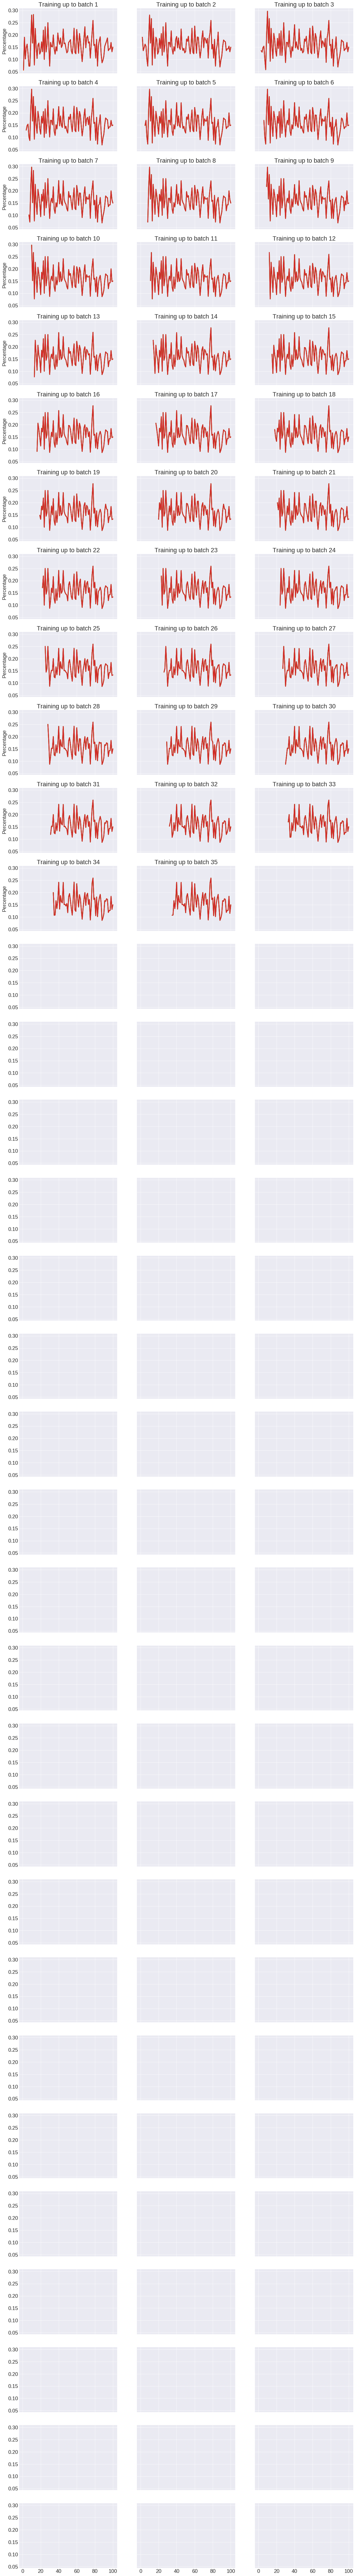

In [6]:
########################################
# Charts: Analysis
########################################

# An attribute name or None.
attribute = 'ADDR_PCT_CD'

# 1st argument: 'dk' or 'all'.
# 2nd argument: 'incremental' or 'global'.

plot_charts(setup_dataframes('nypd6', 'dk', 'incremental', attribute), attribute)

In [ ]:
dataset_name = 'hospital'
df = pd.read_csv(dataset_name + '/monitoring_quality_log.csv', sep=';')

df